In [60]:
'''
TODO

Include title and body in the final model corpus
and analyse that
'''


import pandas as pd
import nltk
#nltk.download("stopwords")
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("ggplot")

df = pd.read_csv("data/data.csv")

df.head()

,flair,title,score,id,url,comms_num,created,body,author
0,AskIndia,Randians who were big time users of dating app...,20,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19,1.584298e+09,I'd my own stint with these apps(a couple of m...,__knockknockturnal__
1,AskIndia,4 days ago we had pending orders of 100 millio...,48,fwjdqr,https://www.reddit.com/r/india/comments/fwjdqr...,4,1.586290e+09,> We are getting frantic calls from our pharma...,india_ko_vanakkam
2,AskIndia,What does r/India thinks about the Flat Earthers?,4,f25vx0,https://www.reddit.com/r/india/comments/f25vx0...,31,1.581441e+09,"I encountered a Foreigner in IG who says "" Rou...",Dev1003
3,AskIndia,People who left their 9 to 5 jobs to pursue a ...,41,dtvliq,https://www.reddit.com/r/india/comments/dtvliq...,34,1.573333e+09,Couldn't add AskIndia flair from the mobile br...,c0mrade34
4,AskIndia,Somebody want to kill my full family what to do?,96,b7pvwt,https://www.reddit.com/r/india/comments/b7pvwt...,24,1.554080e+09,"It's now 24hrs, But local police station is no...",amitkumarthakur


In [64]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2534 entries, 0 to 2533
Data columns (total 9 columns):
flair        2534 non-null object
title        2534 non-null object
score        2534 non-null int64
id           2534 non-null object
url          2534 non-null object
comms_num    2534 non-null int64
created      2534 non-null float64
body         1585 non-null object
author       2534 non-null object
dtypes: float64(1), int64(2), object(6)
memory usage: 178.3+ KB
None


In [65]:
df.isna().sum()

flair          0
title          0
score          0
id             0
url            0
comms_num      0
created        0
body         949
author         0
dtype: int64

In [66]:
df[df.body.isna()]

,flair,title,score,id,url,comms_num,created,body,author
160,AskIndia,[AskIndia] Why the Elders in the Indian Societ...,51,b2jajg,https://www.reddit.com/r/india/comments/b2jajg...,51,1.552948e+09,NaN,AmitNair4175
180,AskIndia,[AskIndia] Crazy 45 day travel itinerary. Two ...,67,9yln0s,https://imgur.com/a/mZ3xM9W,120,1.542695e+09,NaN,PavelSokov
183,AskIndia,[AskIndia] I got this Airtel AD over WhatsApp!...,64,a6btwo,https://imgur.com/a/lrkFND7,44,1.544873e+09,NaN,Brahmi_
184,AskIndia,[AskIndia] I speak modern hindi. Hypotheticall...,105,apdunu,https://www.reddit.com/r/india/comments/apdunu...,23,1.549899e+09,NaN,ajaiswal07
187,AskIndia,[AskIndia] What is the most unethical HR pract...,113,9jdplh,https://www.reddit.com/r/india/comments/9jdplh...,177,1.538090e+09,NaN,InsomniacNimrod
...,...,...,...,...,...,...,...,...,...
2491,AMA,I successfully bought a Redmi Note 5 pro throu...,9,8i7t2x,https://www.reddit.com/r/india/comments/8i7t2x...,16,1.525916e+09,NaN,Starkboy
2494,AMA,India Privacy Bill - AMA by Mozilla,67,976j0r,https://events.mozilla.org/amaindiaprivacybill,2,1.534263e+09,NaN,ranjithrajv
2508,AMA,[NP]Arnab AMA wordcloud,186,67v1ja,https://i.redd.it/zqd3yg9123uy.png,29,1.493322e+09,NaN,hushphatak
2515,AMA,I am an ex Armed Forces guy who has worked in ...,241,36znee,https://www.reddit.com/r/india/comments/36znee...,265,1.432420e+09,NaN,libtn


In [59]:
df.to_csv("data.csv")

# Preliminary Text Analysis of the posts

Finally, we have all the data about the posts that we need for our next part, which is the analysis. We will do the following:

    word count
    numerics count
    uppercase words count
    Average word length
    Character count

We will do these for each of the posts and create a new column for each of these values for their corresponding columns.

In [13]:
#Firstly we will do some exploration of the text

# 1. Counting the number of words in each post
df['word_count'] = df['body'].apply(lambda x: len(str(x).split(" ")))
df['word_count'].describe()

count    2534.000000
mean      205.510260
std       493.870677
min         1.000000
25%         1.000000
50%        44.000000
75%       167.000000
max      6211.000000
Name: word_count, dtype: float64

From this, we get to know that the average length of a post is about 205 words. The word count reaches a maximum of 6211 words.

Now, plotting the word count in a density plot:

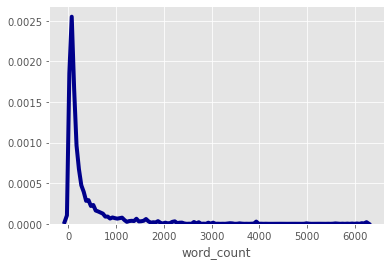

In [14]:
sns.distplot(df['word_count'], hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

This density plot shows us that most of the posts have word counts below 1000.

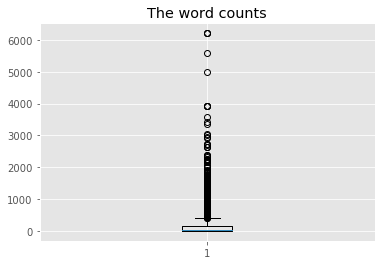

In [15]:
plt.boxplot(df['word_count'])
plt.title("The word counts")
plt.show()

This boxplot confirms both of aur observations from the density plot above.

"Because of the growing unemployment in India due to lack of jobs, it is pretty clear that students need to stand up for themselves and create jobs instead of running for jobs everywhere. That's why I am asking India to enlighten me with some tips to become a good entrepreneur and inspire others to choose this field."

Now doing the rest of the steps

In [24]:
#No. of characters
df['char_count'] = df['body'].str.len()

#No. of numerics
df['numerics'] = df['body'].apply(lambda x: len([x for x in x.split() if x.isdigit()]))

#No. of uppercase words
df['upper_case' ]= df['body'].apply(lambda x: len([x for x in x.split() if x.isupper()]))

#Average word length
def avg_word(sentence):
    words = sentence.split()
    return (sum(len(word) for word in words)/len(words))

df['avg_wlen'] = df['body'].apply(lambda x: avg_word(x))

print(df.columns)
print(df.head())

Index(['flair', 'title', 'score', 'id', 'url', 'comms_num', 'created', 'body',
       'author', 'char_count', 'numerics', 'upper_case', 'avg_wlen'],
      dtype='object')
      flair                                              title  score      id  \
0  AskIndia  Randians who were big time users of dating app...     21  fizkkk   
1  AskIndia  What does r/India thinks about the Flat Earthers?      6  f25vx0   
2  AskIndia  People who left their 9 to 5 jobs to pursue a ...     43  dtvliq   
3  AskIndia   Somebody want to kill my full family what to do?     97  b7pvwt   
4  AskIndia  Need feedback for Insurance Policy that I took...      1  1s57oi   

                                                 url  comms_num       created  \
0  https://www.reddit.com/r/india/comments/fizkkk...         19  1.584298e+09   
1  https://www.reddit.com/r/india/comments/f25vx0...         31  1.581441e+09   
2  https://www.reddit.com/r/india/comments/dtvliq...         34  1.573333e+09   
3  https://www.red


# #Text Pre-processing¶

Next we will apply the following operations on this dataframe.

    Stopword removal
    Punctuation Removal
    Lowercasing
    Tokenization
    Lemmatization: converting all the words into their root word

Note:- We won't be doing the Spelling Correction, because these are articles written by professionals, so we assume, that the last thing they will have is a spelling mistake.

No we will be using the python library nltk and textblob for these processes.

Stop word removal

Stop words create most of the noise in a text and have to be removed in order to gain interactive insights from the text data.


In [25]:
# Importing the list of all stopwords
english_stopwords = set(stopwords.words("english"))

#Stop word removal
df['body'] = df['body'].apply(lambda x: ' '.join([x for x in x.split() if x not in english_stopwords]))
df.head()

,flair,title,score,id,url,comms_num,created,body,author,char_count,numerics,upper_case,avg_wlen
0,AskIndia,Randians who were big time users of dating app...,21,fizkkk,https://www.reddit.com/r/india/comments/fizkkk...,19,1.584298e+09,I'd stint apps(a couple months) one point feel...,__knockknockturnal__,172,0,1,4.419355
1,AskIndia,What does r/India thinks about the Flat Earthers?,6,f25vx0,https://www.reddit.com/r/india/comments/f25vx0...,31,1.581441e+09,"I encountered Foreigner IG says "" Round Earth ...",Dev1003,224,0,3,3.891304
2,AskIndia,People who left their 9 to 5 jobs to pursue a ...,43,dtvliq,https://www.reddit.com/r/india/comments/dtvliq...,34,1.573333e+09,Couldn't add AskIndia flair mobile browser,c0mrade34,51,0,0,5.500000
3,AskIndia,Somebody want to kill my full family what to do?,97,b7pvwt,https://www.reddit.com/r/india/comments/b7pvwt...,24,1.554080e+09,"It's 24hrs, But local police station register ...",amitkumarthakur,363,0,1,11.821429
4,AskIndia,Need feedback for Insurance Policy that I took...,1,1s57oi,https://www.reddit.com/r/india/comments/1s57oi...,1,1.386254e+09,**Re-posting lack activity /r/AskIndia** Hello...,dhavalcoholic,1022,3,10,4.406417


**Identifying the stopwords and the rare words**
Stopwords are the most common words that occur, but before that, we will first remove the most common stopwords, of the english language, that cause noise in the text. For eg.- is, am, are, etc.

In [36]:
stop_words = pd.Series(' '.join(df['body']).split()).value_counts()[:10]
rare_words = pd.Series(' '.join(df['body']).split()).value_counts()[-10:]
print("The top 10 stop words(most common words) are:\n", stop_words)
print("The top 10 rare words(most uncommon words) are:\n", rare_words)

The top 10 stop words(most common words) are:
 i         6464
*         2978
the       2388
india     1694
-         1652
like      1283
people    1259
it        1207
one       1118
would     1028
dtype: int64
The top 10 rare words(most uncommon words) are:
 shit-ton                                                                                                                                                        1
overlap                                                                                                                                                         1
[[inc42]https://inc42com/flash-feed/nobroker-funding/]                                                                                                          1
bred                                                                                                                                                            1
[https://theinterceptcom/2019/01/05/tulsi-gabbard-2020-hindu-nationalist-modi/]https://theint

In [46]:
df['body']=df['body'].apply(lambda x: ' '.join([x for x in x.split() if x not in stop_words]))

In [52]:
# Lowercasing
df['body'] = df['body'].apply(lambda x: x.lower())


########## TO FIX
# Punctuation Removal
df['body'] = df['body'].str.replace("[{!@#$%.:;`'(*&^)}]?-_",'')
print("This is how a post looks like now:\n", df["body"][0])

This is how a post looks like now:
 id stint appsa couple months point feel right whats story? ps askindia flair aint working mods


# Advanced Processing

Now well be doing some more advanced processing work with the articles, like:

    N-grams
    Term Frequency(TF)
    Inverse Document Frequency(IDF)
    Term Frequency-Inverse Document Frequency(TF-IDF)

Visualizing the top 15 N-grams(Only Uni-grams, Bi-grams and Tri-grams)

We will visualize them using barplots with the help of Python's seaborn library.

**Uni-grams**

     uni-grams  Freq
0        https  2566
1        india  1764
2         http  1693
3         this  1295
4       indian  1242
5           in  1213
6         also  1090
7         time  1000
8         news   981
9   government   971
10         get   954
11         nan   949
12         and   942
13        even   886
14          to   857
15          we   817
16       years   796
17          us   778
18         but   775
19         new   774


[Text(0, 0, 'https'),
 Text(0, 0, 'india'),
 Text(0, 0, 'http'),
 Text(0, 0, 'this'),
 Text(0, 0, 'indian'),
 Text(0, 0, 'in'),
 Text(0, 0, 'also'),
 Text(0, 0, 'time'),
 Text(0, 0, 'news'),
 Text(0, 0, 'government'),
 Text(0, 0, 'get'),
 Text(0, 0, 'nan'),
 Text(0, 0, 'and'),
 Text(0, 0, 'even'),
 Text(0, 0, 'to'),
 Text(0, 0, 'we'),
 Text(0, 0, 'years'),
 Text(0, 0, 'us'),
 Text(0, 0, 'but'),
 Text(0, 0, 'new')]

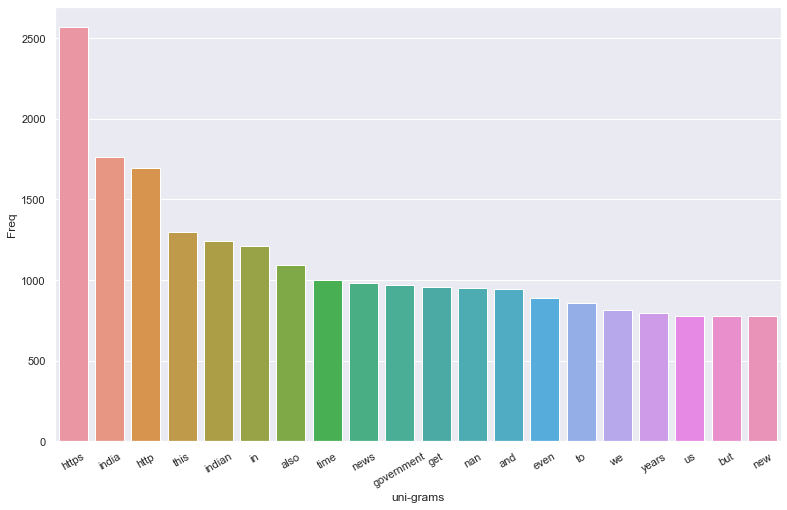

In [48]:
from sklearn.feature_extraction.text import CountVectorizer
import re
#Most frequently occuring words
arr=list(df['body'])

def get_top_n_words(arr, n=None):
    vec = CountVectorizer().fit(arr)
    bag_of_words = vec.transform(arr)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
  
#Convert most freq words to dataframe for plotting bar plot
top_words = get_top_n_words(arr, n=20)
top_df = pd.DataFrame(top_words)
top_df.columns=["uni-grams", "Freq"]
print(top_df)

#Now visualizing the barplot
sns.set(rc={'figure.figsize':(13,8)})
g = sns.barplot(x="uni-grams", y="Freq", data=top_df)
g.set_xticklabels(g.get_xticklabels(), rotation=30)

**Bi-grams**

                                Bi-gram  Freq
0                    https wwwredditcom   320
1                    wwwredditcom india   316
2                        india comments   297
3                      https twittercom   194
4   techeconomictimesindiatimescom news   168
5   http techeconomictimesindiatimescom   166
6                             last week   163
7                    https wwwgooglecom   152
8                  wwwgooglecom finance   140
9                              covid 19   111
10                          ettech http   111
11                        news startups   108
12                        supreme court   107
13      http economictimesindiatimescom   103
14                  https wwwyoutubecom    99
15                    http wwwredditcom    95
16                  enwikipediaorg wiki    93
17                            week open    91
18                             week end    91
19           techcirclevccirclecom 2016    91


[Text(0, 0, 'https wwwredditcom'),
 Text(0, 0, 'wwwredditcom india'),
 Text(0, 0, 'india comments'),
 Text(0, 0, 'https twittercom'),
 Text(0, 0, 'techeconomictimesindiatimescom news'),
 Text(0, 0, 'http techeconomictimesindiatimescom'),
 Text(0, 0, 'last week'),
 Text(0, 0, 'https wwwgooglecom'),
 Text(0, 0, 'wwwgooglecom finance'),
 Text(0, 0, 'covid 19'),
 Text(0, 0, 'ettech http'),
 Text(0, 0, 'news startups'),
 Text(0, 0, 'supreme court'),
 Text(0, 0, 'http economictimesindiatimescom'),
 Text(0, 0, 'https wwwyoutubecom'),
 Text(0, 0, 'http wwwredditcom'),
 Text(0, 0, 'enwikipediaorg wiki'),
 Text(0, 0, 'week open'),
 Text(0, 0, 'week end'),
 Text(0, 0, 'techcirclevccirclecom 2016')]

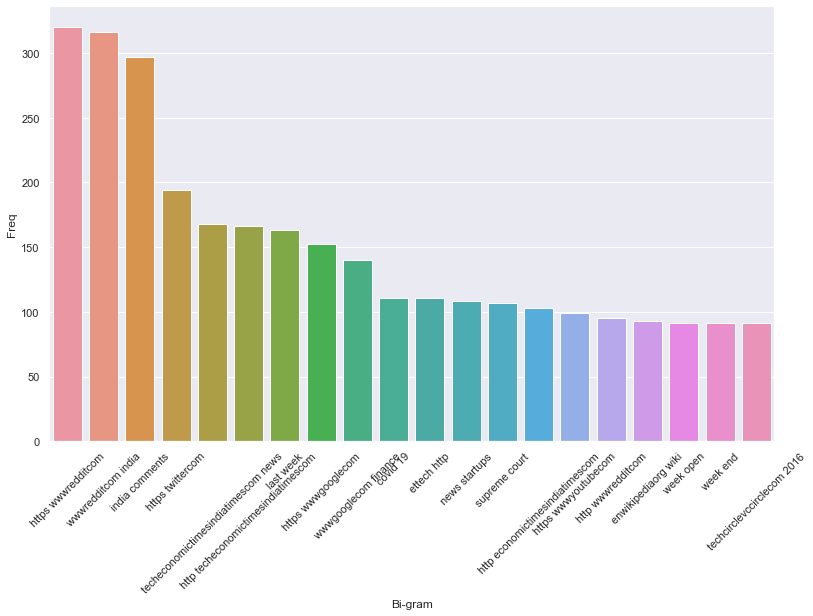

In [49]:
def get_top_n2_words(arr, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2),  
            max_features=2000).fit(arr)
    bag_of_words = vec1.transform(arr)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top2_words = get_top_n2_words(arr, n=20)
top2_df = pd.DataFrame(top2_words)
top2_df.columns=["Bi-gram", "Freq"]
print(top2_df)

#The barplot of the bi-grams
sns.set(rc={'figure.figsize':(13,8)})
h=sns.barplot(x="Bi-gram", y="Freq", data=top2_df)
h.set_xticklabels(h.get_xticklabels(), rotation=45)

**Tri-grams**

                                        Tri-gram  Freq
0                       https wwwredditcom india   291
1                    wwwredditcom india comments   237
2       http techeconomictimesindiatimescom news   166
3                     https wwwgooglecom finance   140
4   techeconomictimesindiatimescom news startups   108
5     ettech http techeconomictimesindiatimescom   103
6                      https enwikipediaorg wiki    90
7                http techcirclevccirclecom 2016    90
8                       economic calendar indian    73
9                      wwwredditcom india search    72
10                  http ininvestingcom economic    71
11              ininvestingcom economic calendar    71
12                           restrict_sr on sort    70
13                                   on sort new    69
14                                  sort new all    69
15                  wwwthehinducom news national    68
16                     https wwwyoutubecom watch    66
17        

[Text(0, 0, 'https wwwredditcom india'),
 Text(0, 0, 'wwwredditcom india comments'),
 Text(0, 0, 'http techeconomictimesindiatimescom news'),
 Text(0, 0, 'https wwwgooglecom finance'),
 Text(0, 0, 'techeconomictimesindiatimescom news startups'),
 Text(0, 0, 'ettech http techeconomictimesindiatimescom'),
 Text(0, 0, 'https enwikipediaorg wiki'),
 Text(0, 0, 'http techcirclevccirclecom 2016'),
 Text(0, 0, 'economic calendar indian'),
 Text(0, 0, 'wwwredditcom india search'),
 Text(0, 0, 'http ininvestingcom economic'),
 Text(0, 0, 'ininvestingcom economic calendar'),
 Text(0, 0, 'restrict_sr on sort'),
 Text(0, 0, 'on sort new'),
 Text(0, 0, 'sort new all'),
 Text(0, 0, 'wwwthehinducom news national'),
 Text(0, 0, 'https wwwyoutubecom watch'),
 Text(0, 0, 'techcircle http techcirclevccirclecom'),
 Text(0, 0, 'amp amp amp'),
 Text(0, 0, 'wwwbusiness standardcom article')]

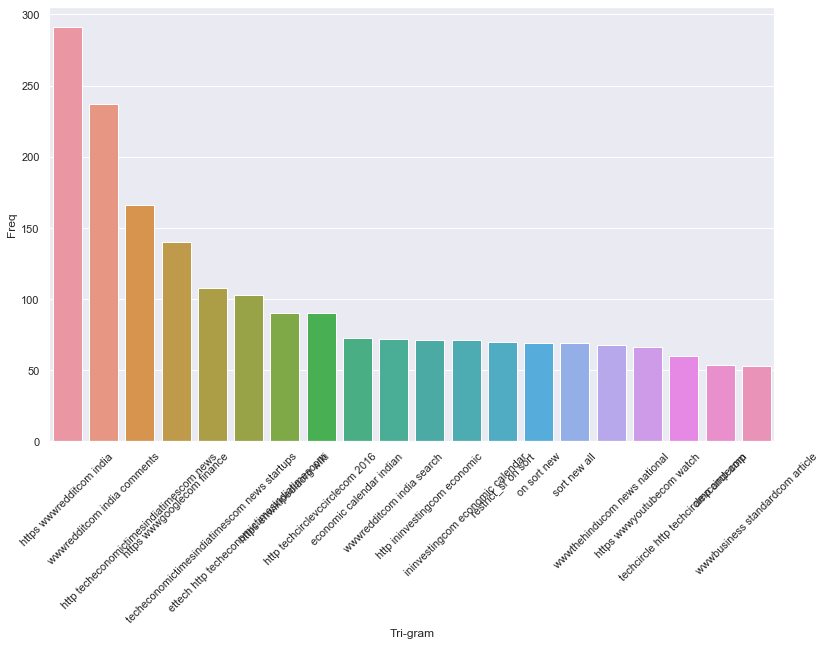

In [45]:
#Most frequently occuring Tri-grams
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), 
           max_features=2000).fit(arr)
    bag_of_words = vec1.transform(arr)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in     
                  vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], 
                reverse=True)
    return words_freq[:n]
top3_words = get_top_n3_words(arr, n=20)
top3_df = pd.DataFrame(top3_words)
top3_df.columns=["Tri-gram", "Freq"]
print(top3_df)

#The barplot
sns.set(rc={'figure.figsize':(13,8)})
j=sns.barplot(x="Tri-gram", y="Freq", data=top3_df)
j.set_xticklabels(j.get_xticklabels(), rotation=45)